In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

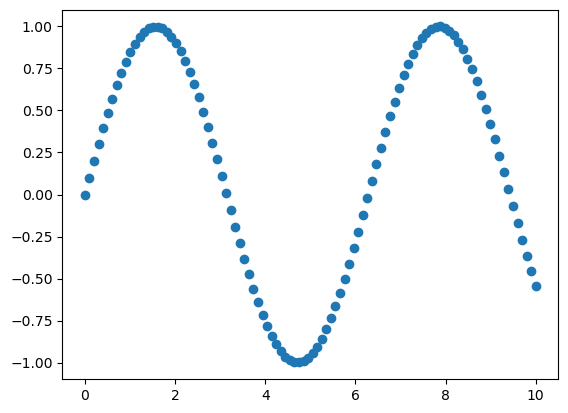

In [8]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.scatter(x, y)

In [9]:
?plt.scatter

Mar


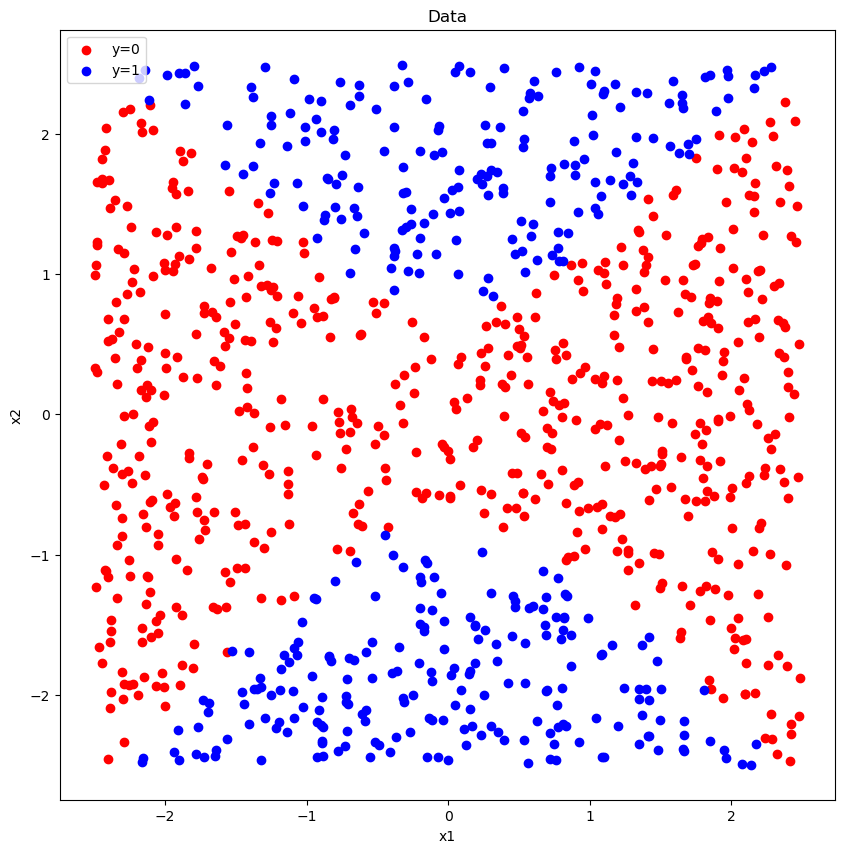

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 造一点数据
X = (np.random.rand(1000, 2)-0.5)*5 # (n, p)
y = (-X[:, 0]**2 + X[:, 1]**2 > 0.5) * 1 # (n, 1)

# 构造一些特征：x1^2, x2^2, x1, x2, 1
X = np.concatenate([X, np.ones((X.shape[0], 1)), X**2], axis=1) # (n, 6)

# 绘制一下数据
plt.figure(figsize=(10, 10), dpi=100)
plt.title("Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', label="y=0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label="y=1")
plt.legend()

In [0]:
# 定义各个函数
def sigmoid(x):
    # x: (n, p)
    # return: (n, p)
    return 1 / (1 + np.exp(-x))

def cross_entropy(y, y_hat):
    # y: (n, 1)
    # y_hat: (n, 1)
    # return: 标量
    return np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

def cal_z(x, W):
    # x: (n, p)
    # W: (p, 1) 二分类问题, 对于多分类问题, W的维度是(p, C)
    return np.dot(x, W) # (n, 1)

def cal_loss(x, y, W):
    y_hat = sigmoid(cal_z(x, W))
    return cross_entropy(y, y_hat)

def cal_grad(x, y, W):
    # x: (n, p)
    # y: (n, 1)
    # W: (p, 1)
    # return: (p, 1)

    z = cal_z(x, W)
    y_hat = sigmoid(z)
    y = y.reshape(-1, 1) # (n, 1)

    dL_dsigma = -y / y_hat + (1 - y) / (1 - y_hat) # (n, 1)
    dsigma_dz = y_hat * (1 - y_hat) # (n, 1)
    dz_dw = x # (n, p)

    grad = (dL_dsigma * dsigma_dz).T.dot(dz_dw) # (1, n) * (n, p) = (1, p)
    grad = grad.T # (p, 1)
    grad /= x.shape[0] # (p, 1)

    return grad

def accuracy(x, y, W):
    # 我们用一个简单的方法来计算准确率
    y_hat = sigmoid(cal_z(x, W))
    y_hat = y_hat.reshape(-1)
    y_hat = y_hat > 0.5
    y_hat = y_hat * 1
    # 这里0.5是一个阈值, 可以自己调整
    return np.mean(y_hat == y)


Iteration: 0, Loss: 2245976.71565848, Accuracy: 0.443
Iteration: 10, Loss: 1737019.656206193, Accuracy: 0.605
Iteration: 20, Loss: 1625654.9857381142, Accuracy: 0.702
Iteration: 30, Loss: 1608061.0107299394, Accuracy: 0.773
Iteration: 40, Loss: 1620093.9653055442, Accuracy: 0.826
Iteration: 50, Loss: 1645062.3806245567, Accuracy: 0.869
Iteration: 60, Loss: 1675801.343021285, Accuracy: 0.905
Iteration: 70, Loss: 1708846.823344613, Accuracy: 0.921
Iteration: 80, Loss: 1742603.5514674222, Accuracy: 0.937
Iteration: 90, Loss: 1776305.2234864356, Accuracy: 0.948
Iteration: 100, Loss: 1809567.412737212, Accuracy: 0.961
Iteration: 110, Loss: 1842198.1779460758, Accuracy: 0.973
Iteration: 120, Loss: 1874107.8949609676, Accuracy: 0.976
Iteration: 130, Loss: 1905262.5757651601, Accuracy: 0.977
Iteration: 140, Loss: 1935658.748299301, Accuracy: 0.98
Iteration: 150, Loss: 1965309.6362727536, Accuracy: 0.983
Iteration: 160, Loss: 1994237.4073451832, Accuracy: 0.985
Iteration: 170, Loss: 2022468.746

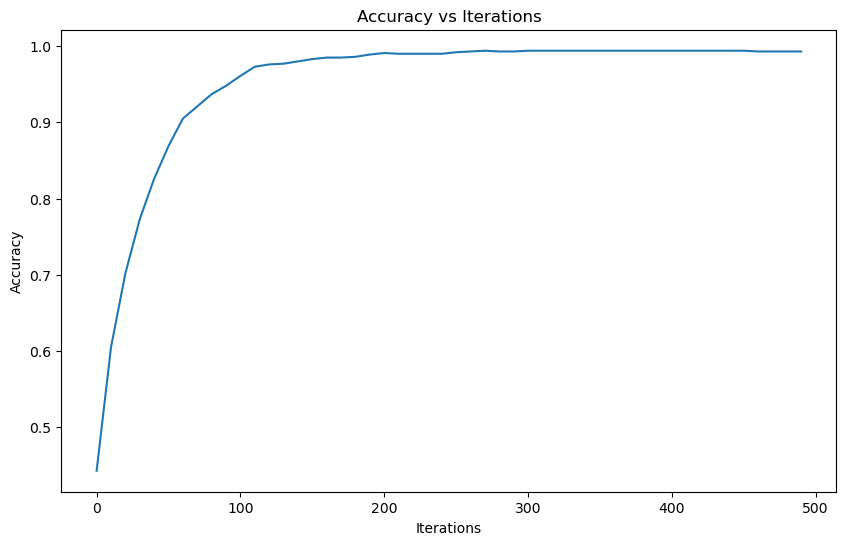

C:\Users\Lifan Lin\AppData\Local\Temp\ipykernel_18140\3056507438.py:91: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


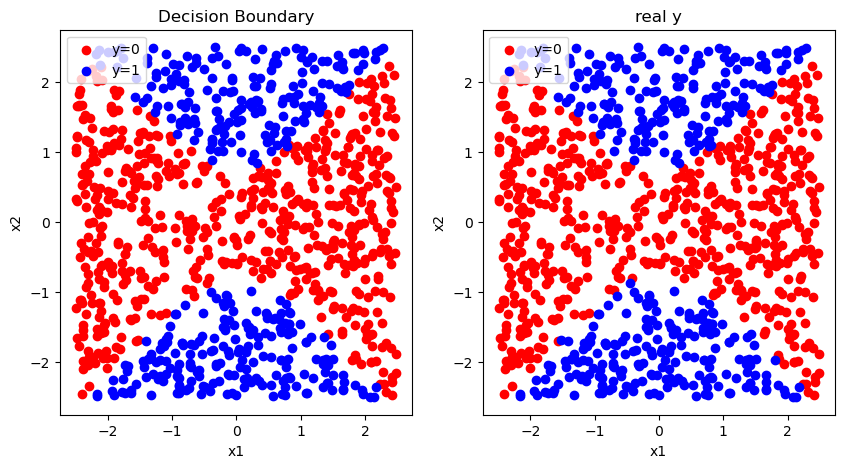

In [58]:

# 参数初始化
## 二分类问题
train_size = 1000
num_features = 5
num_classes = 1

## model parameters initialization
W = np.random.randn(num_features, num_classes) # (p, 1)


# 运用梯度下降优化损失函数

iterations = 500
learning_rate = 1e-1 # 学习率, 可以自己调整. 对于不同问题, 学习率的选择是不同的.

# 绘图参数
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Accuracy vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

accs = []
## 50次迭代绘制一次图
iters_obs = range(0, iterations, 10)


for i in range(iterations):
    grad = cal_grad(X, y, W)
    W -= learning_rate * grad
    loss = cal_loss(X, y, W)
    if i in iters_obs:
        acc = accuracy(X, y, W)
        accs.append(acc)
        print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss, acc))

# 绘图
plt.plot(iters_obs, accs)
plt.show()

# 绘制决策边界
plt.subplots(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
y_hat = sigmoid(cal_z(X, W))
label_pred = y_hat > 0.5
label_pred = label_pred.reshape(-1)
plt.scatter(X[label_pred==0, 0], X[label_pred==0, 1], c='r', label="y=0")
plt.scatter(X[label_pred==1, 0], X[label_pred==1, 1], c='b', label="y=1")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("real y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', label="y=0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label="y=1")
plt.legend()
plt.show()


In [54]:
np.hstack([label_pred.reshape(-1, 1), y.reshape(-1, 1)])


array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]])

In [55]:
accuracy(X, y, W)

0.522866